# Solução Proposta - Competição DSA de Machine Learning
# Edição Janeiro/2019

In [1]:
import os
path = os.getcwd()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
%matplotlib inline

In [3]:
pima = pd.read_csv('diabetes.csv', 
                   header = None, sep = ",",
                   names=['Pregnancy', 'Glucose', 'BloodPressure' ,'SkinfoldThickness', 'Insulin', 'BodyMassIndex', 'DiabetesPedigreeFunction', 'Age', 'Class'])   

In [4]:
pima.head(5)

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
Pregnancy                   768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinfoldThickness           768 non-null int64
Insulin                     768 non-null int64
BodyMassIndex               768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [6]:
pima.describe() 

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
pima[pima.isnull().any(axis=1)] 

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class


In [8]:
pima.isnull().values.any() 

False

## Análise Exploratória

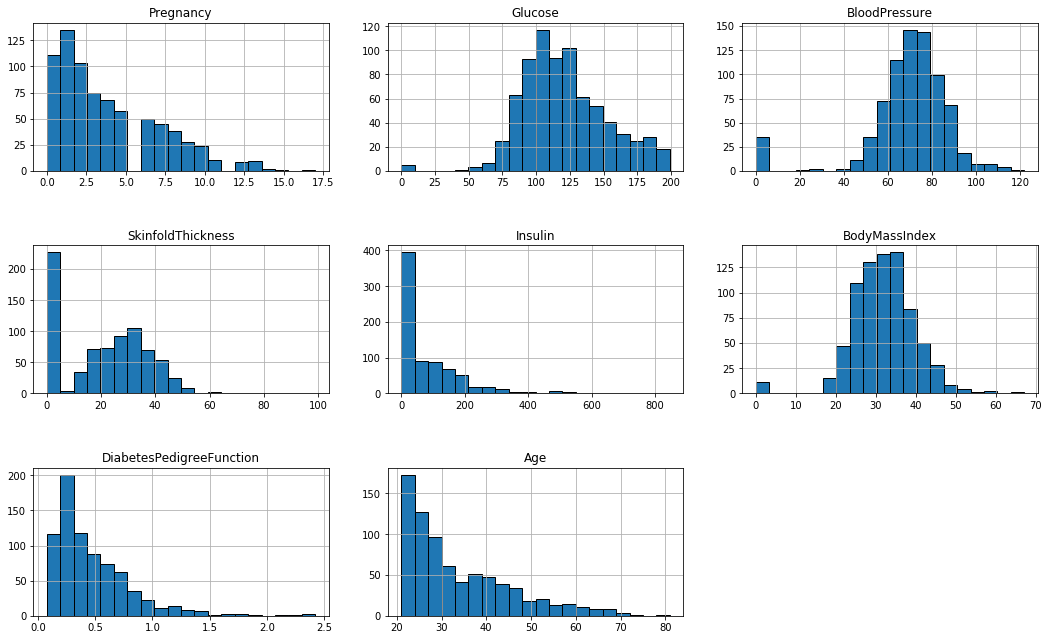

In [9]:
# Análise dos dados
columns=pima.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in zip(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    pima[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

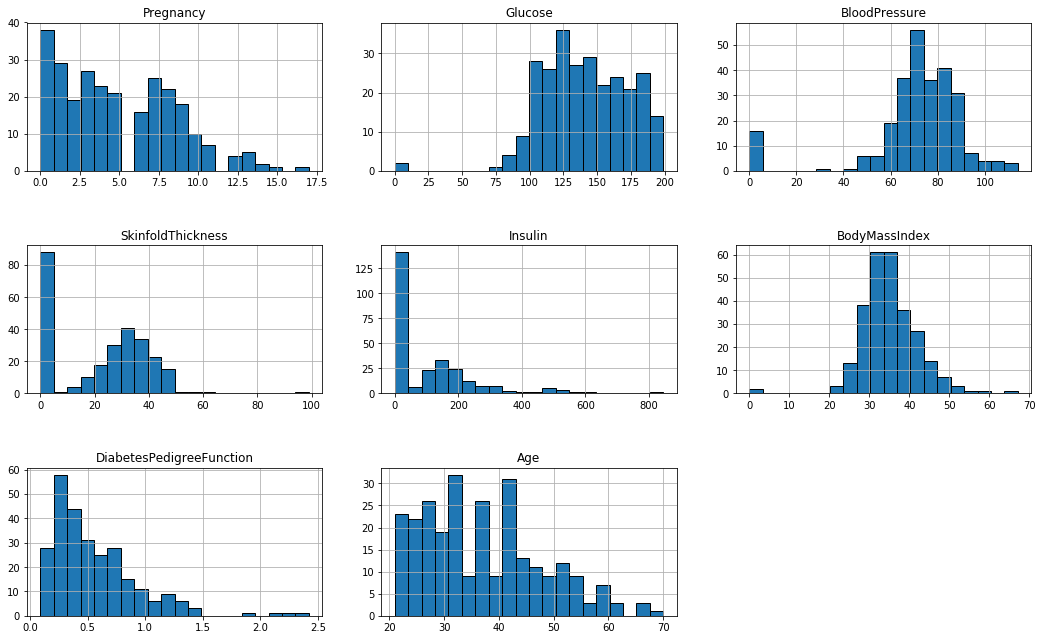

In [10]:
# Análise de casos de diabetes
pima1=pima[pima['Class']==1]
columns=pima.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in zip(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    pima1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Pregnancy                      AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinfoldThickness              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BodyMassIndex               AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Class                          AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

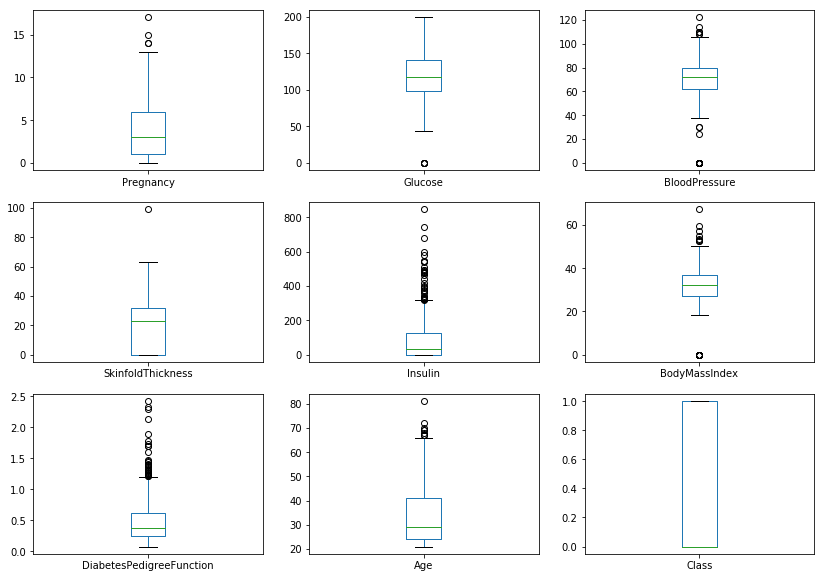

In [11]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3),figsize=(14,10))

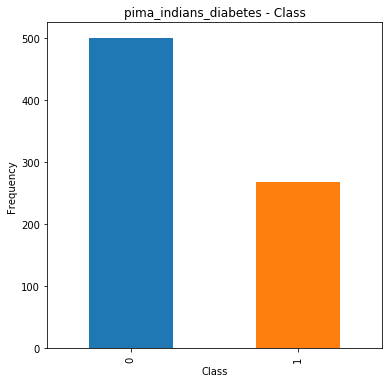

In [12]:
pima['Class'].value_counts().plot(kind='bar', figsize=(6,6))
plt.title('pima_indians_diabetes - Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### Relacionamento Entre Atributos

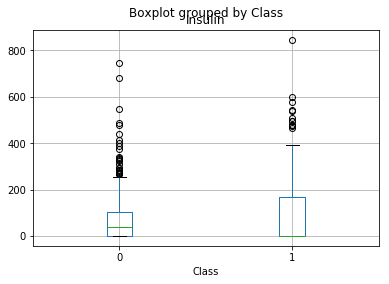

In [13]:
pima.boxplot(column='Insulin',by='Class')
plt.show()

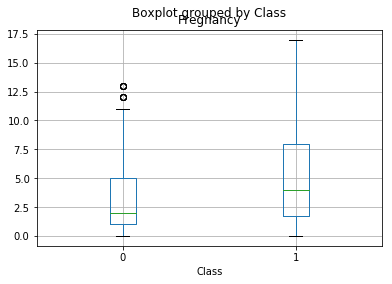

In [14]:
pima.boxplot(column='Pregnancy',by='Class')
plt.show()

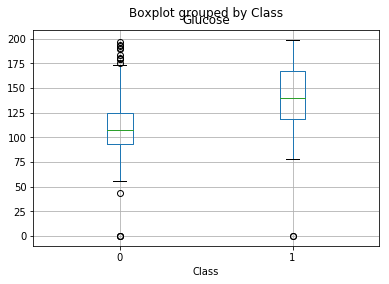

In [15]:
pima.boxplot(column='Glucose',by='Class')
plt.show()

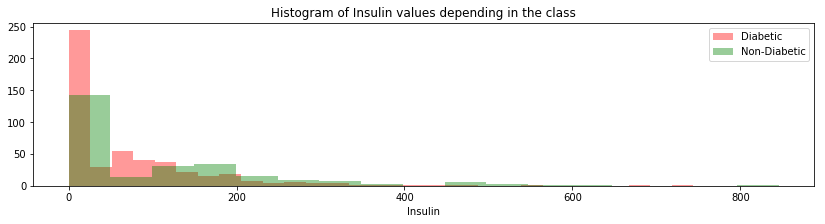

In [16]:
plt.figure(figsize=(14,3))
Insulin_plt = pima.groupby(pima['Insulin']).Class.count().reset_index()
sns.distplot(pima[pima.Class == 0]['Insulin'], color='red', kde=False, label='Diabetic')
sns.distplot(pima[pima.Class == 1]['Insulin'], color='green', kde=False, label='Non-Diabetic')
plt.legend()
plt.title('Histogram of Insulin values depending in the class')
plt.show()

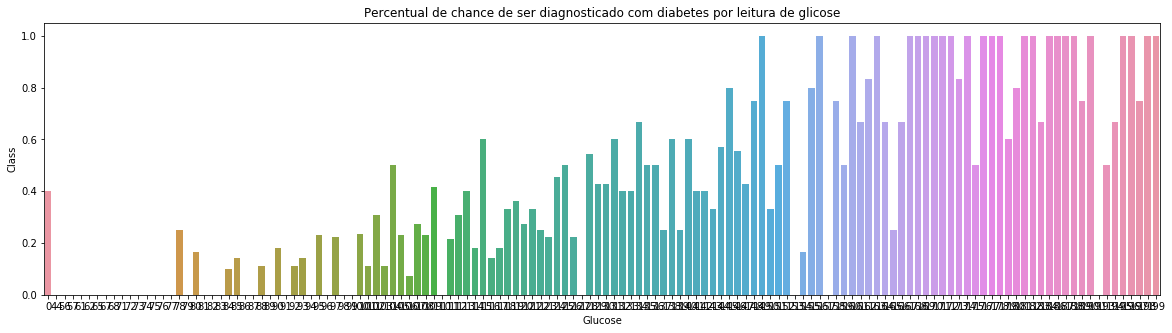

In [17]:
plt.figure(figsize=(20,5))
glucose_plt = pima.groupby('Glucose').Class.mean().reset_index()
sns.barplot(glucose_plt.Glucose, glucose_plt.Class)
plt.title('Percentual de chance de ser diagnosticado com diabetes por leitura de glicose')
plt.show()

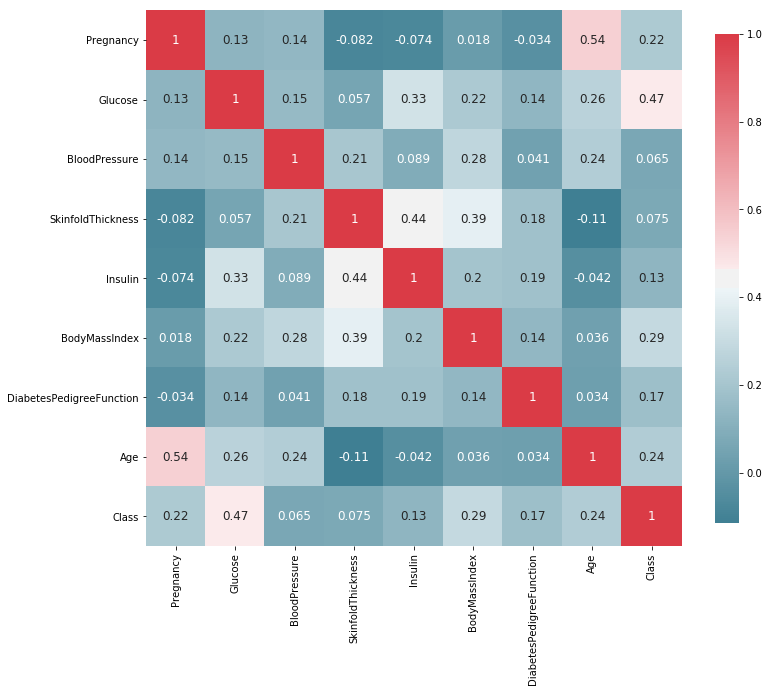

In [18]:
corr = pima.corr()
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = {'fontsize' : 12 })

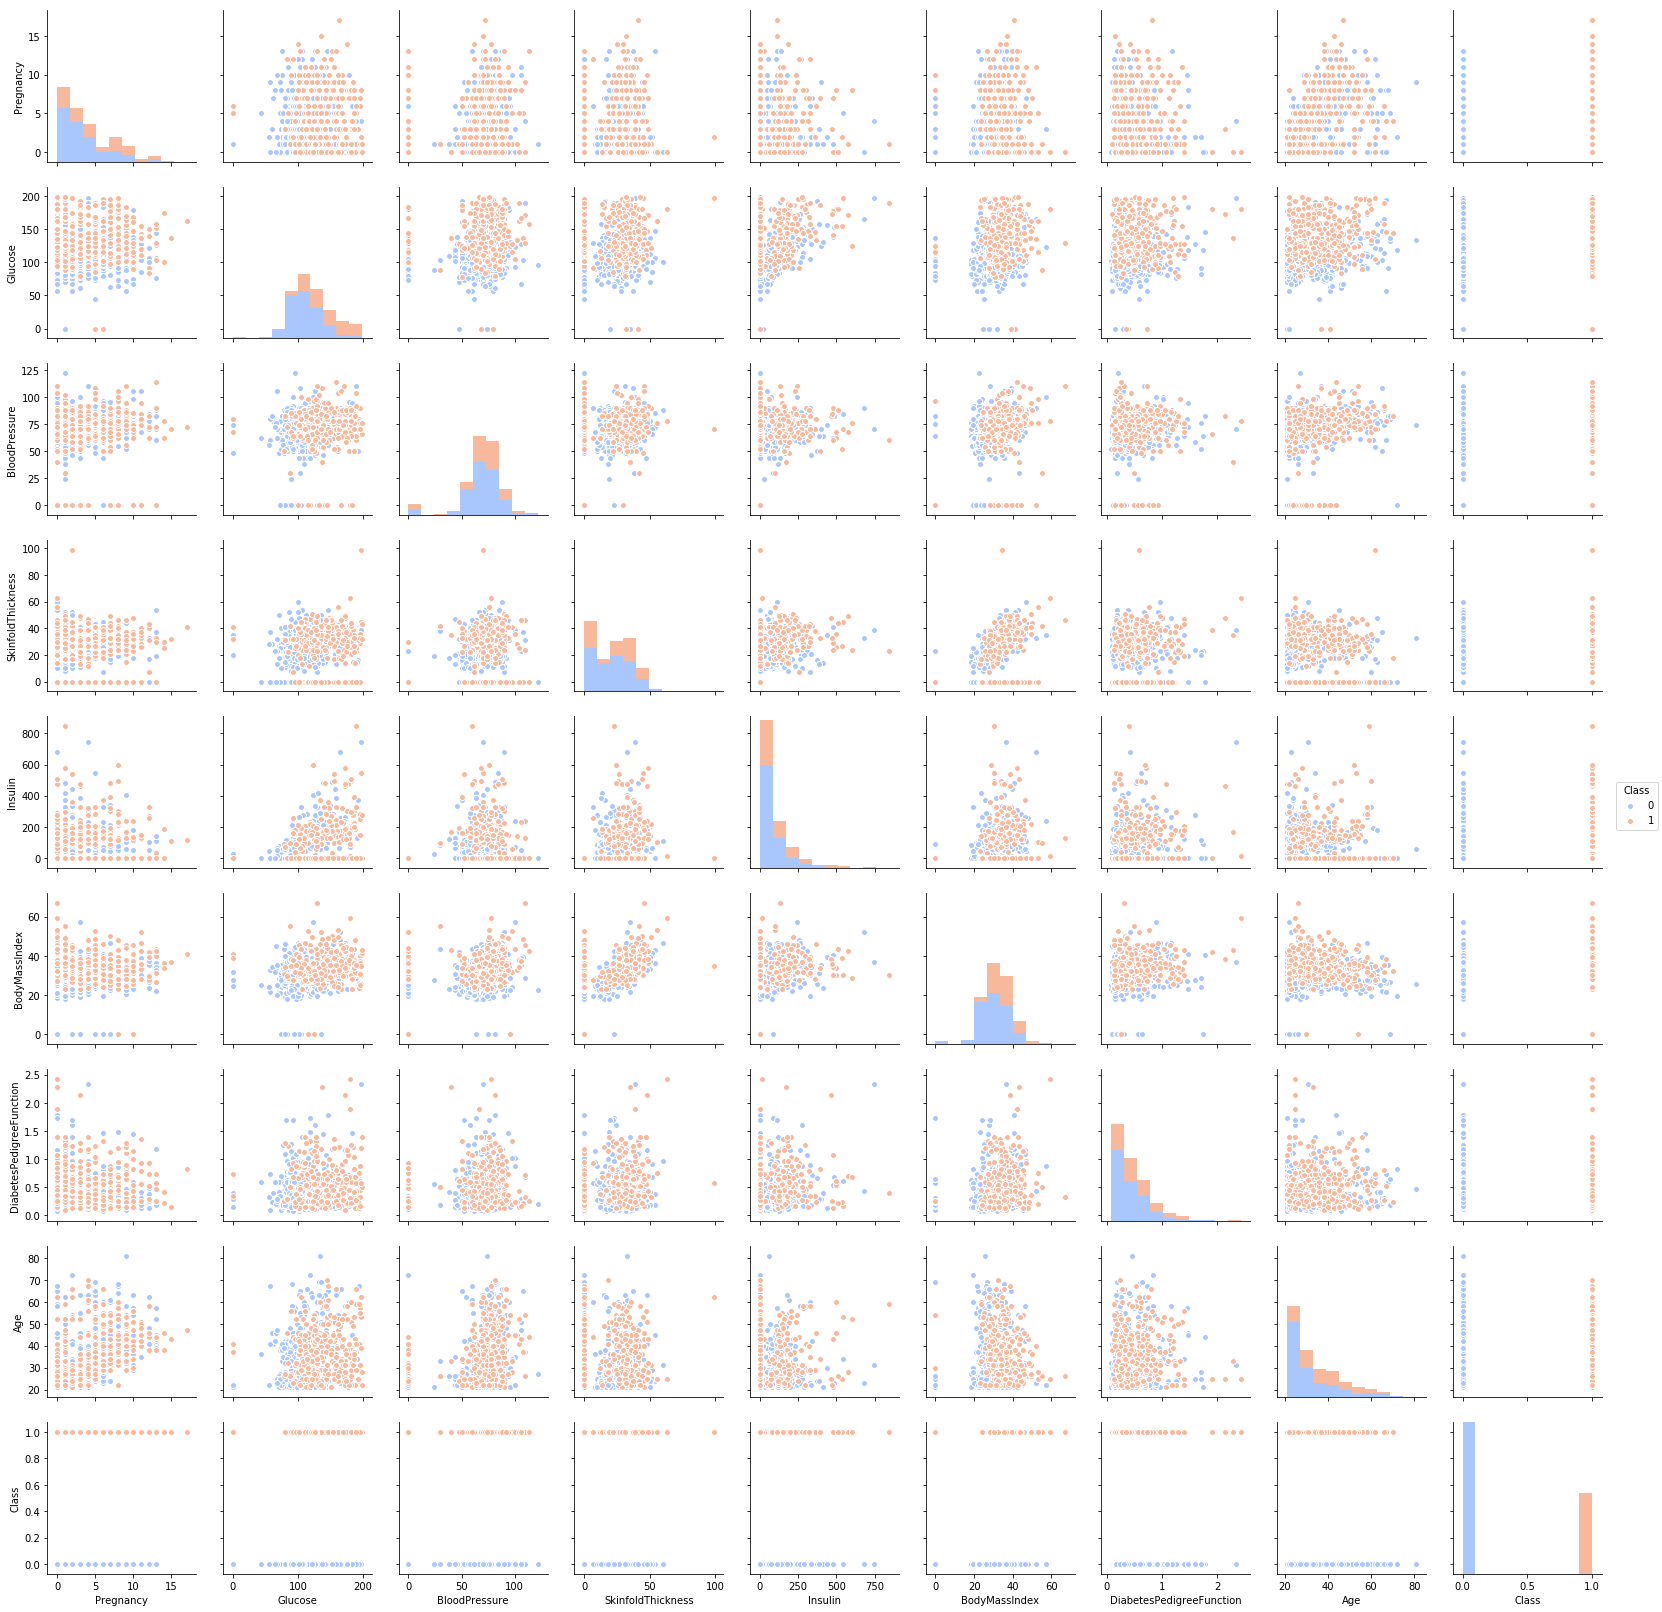

In [19]:
import seaborn as sns
sns.pairplot(pima,hue='Class',palette='coolwarm')

## Limpeza de Dados

In [20]:
# Check for zero values
print("Number of missing values : " + repr(pima[pima.Glucose == 0].shape[0]))
print(pima[pima.Glucose == 0].groupby('Class')['Class'].count())

Number of missing values : 5
Class
0    3
1    2
Name: Class, dtype: int64


In [21]:
# Replace zero value with the mean value of the classes
Glucose_0 = pima[(pima['Glucose']== 0)]
pima[(pima['Glucose']== 0) & (pima['Class'] == 0)] = Glucose_0[Glucose_0['Class']== 0].replace(0, pima[(pima['Class']== 0)].mean())
pima[(pima['Glucose']== 0) & (pima['Class'] == 1)] = Glucose_0[Glucose_0['Class']== 1].replace(0, pima[(pima['Class']== 1)].mean())

In [22]:
# Check for zero values
print("Number of missing values : " + repr(pima[pima.BloodPressure == 0].shape[0]))
print(pima[pima.BloodPressure == 0].groupby('Class')['Class'].count())

Number of missing values : 35
Class
0    19
1    16
Name: Class, dtype: int64


In [23]:
# Replace zero value with the mean value of the classes
BloodPressure_0 = pima[(pima['BloodPressure']== 0)]
pima[(pima['BloodPressure']== 0) & (pima['Class'] == 0)] = BloodPressure_0[BloodPressure_0['Class']== 0].replace(0, pima[(pima['Class']== 0)].mean())
pima[(pima['BloodPressure']== 0) & (pima['Class'] == 1)] = BloodPressure_0[BloodPressure_0['Class']== 1].replace(0, pima[(pima['Class']== 1)].mean())

In [24]:
# Check for zero values
print("Number of missing values : " + repr(pima[pima.SkinfoldThickness == 0].shape[0]))
print(pima[pima.SkinfoldThickness == 0].groupby('Class')['Class'].count())

Number of missing values : 194
Class
0    121
1     73
Name: Class, dtype: int64


In [25]:
# Replace zero value with the mean value of the classes
SkinfoldThickness_0 = pima[(pima['SkinfoldThickness']== 0)]
pima[(pima['SkinfoldThickness']== 0) & (pima['Class'] == 0)] = SkinfoldThickness_0[SkinfoldThickness_0['Class']== 0].replace(0, pima[(pima['Class']== 0)].mean())
pima[(pima['SkinfoldThickness']== 0) & (pima['Class'] == 1)] = SkinfoldThickness_0[SkinfoldThickness_0['Class']== 1].replace(0, pima[(pima['Class']== 1)].mean())

In [26]:
# Check for zero values
print("Number of abnormal cases in skinfold thickness : " + repr(pima[pima.SkinfoldThickness > 60].shape[0]))
print(pima[pima.SkinfoldThickness > 60]['SkinfoldThickness'])
print(pima[pima.SkinfoldThickness > 60].groupby('Class')['Class'].count())

Number of abnormal cases in skinfold thickness : 2
446    63.0
580    99.0
Name: SkinfoldThickness, dtype: float64
Class
1    2
Name: Class, dtype: int64


In [27]:
# imputing impossible value with mean value
pima['SkinfoldThickness'].iloc[579] = pima['SkinfoldThickness'].mean()

In [28]:
# Check for zero values
print("Number of missing values : " + repr(pima[pima.Insulin == 0].shape[0]))
print(pima[pima.Insulin == 0].groupby('Class')['Class'].count())

Number of missing values : 141
Class
0    94
1    47
Name: Class, dtype: int64


In [29]:
# Replace zero value with the mean value of the classes
Insulin_0 = pima[(pima['Insulin']== 0)]
pima[(pima['Insulin']== 0) & (pima['Class'] == 0)] = Insulin_0[Insulin_0['Class']== 0].replace(0, pima[(pima['Class']== 0)].mean())
pima[(pima['Insulin']== 0) & (pima['Class'] == 1)] = Insulin_0[Insulin_0['Class']== 1].replace(0, pima[(pima['Class']== 1)].mean())

In [30]:
# Check for zero values
print("Number of missing values : " + repr(pima[pima.BodyMassIndex == 0].shape[0]))
print(pima[pima.BodyMassIndex == 0].groupby('Class')['Class'].count())

Number of missing values : 1
Class
0    1
Name: Class, dtype: int64


In [31]:
# Replace zero value with the mean value of the classes
BodyMassIndex_0 = pima[(pima['BodyMassIndex']== 0)] 
pima[(pima['BodyMassIndex']== 0) & (pima['Class'] == 0)] = BodyMassIndex_0[BodyMassIndex_0['Class']== 0].replace(0, pima[(pima['Class']== 0)].mean())
pima[(pima['BodyMassIndex']== 0) & (pima['Class'] == 1)] = BodyMassIndex_0[BodyMassIndex_0['Class']== 1].replace(0, pima[(pima['Class']== 1)].mean())

In [32]:
pima.describe() 

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.126263,121.691999,72.267826,26.770604,124.771038,32.441053,0.471876,33.240885,0.348958
std,3.202732,30.461151,12.115948,9.144460,91.935806,6.880054,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.371904,71.691720,27.500000,0.243750,24.000000,0.000000
50%,3.324384,117.000000,72.000000,23.404712,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,136.297569,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


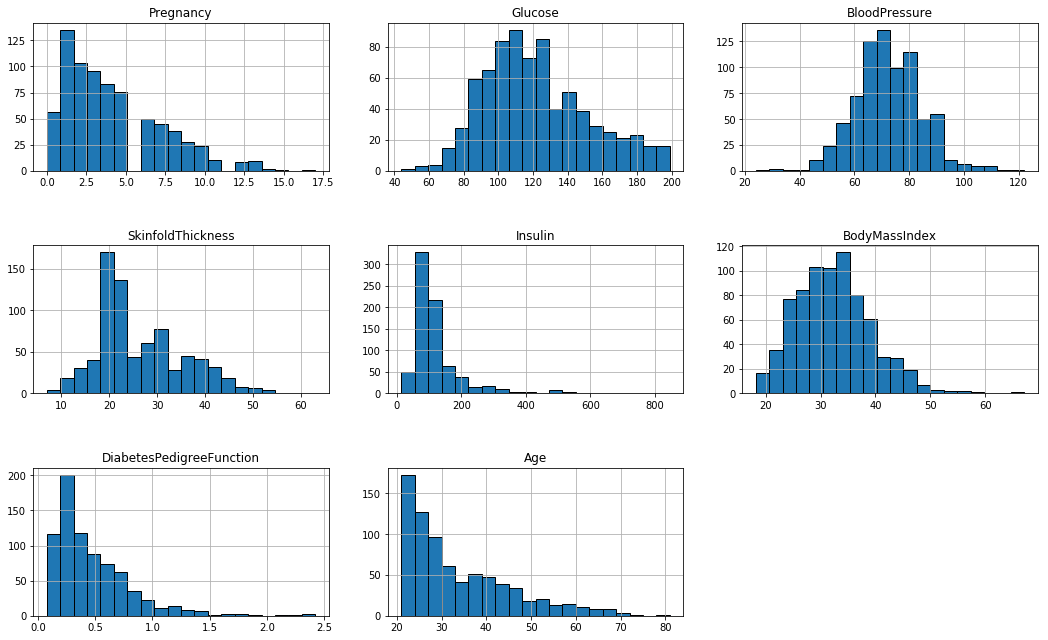

In [33]:
columns=pima.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in zip(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    pima[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Pregnancy                      AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinfoldThickness              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BodyMassIndex               AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Class                          AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

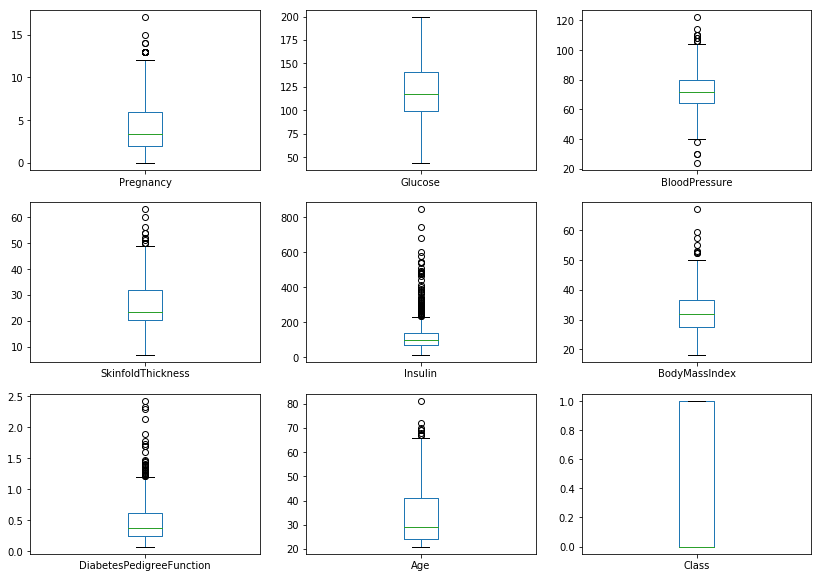

In [34]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3),figsize=(14,10))

## Modelagem dos Dados

In [35]:
pima.Class.value_counts()

0    500
1    268
Name: Class, dtype: int64

In [36]:
random_state=12342

In [37]:
#data = pima.copy().iloc[:, 0:8].values
#target = pima.copy().iloc[:, 8:9].Class.values

In [38]:
!pip install imblearn
import imblearn


In [39]:
import imblearn
# Obs: pode ser necessário reiniciar o Jupyter para poder carregar o pacote

In [40]:
# Oversampling data is given with a subscript of 'o'
np.random.seed(75)
from imblearn.over_sampling import SMOTE, ADASYN
data_o, target_o = SMOTE().fit_sample(pima, pima.Class)

In [41]:
data_o.shape

(1000, 9)

In [42]:
target_o.shape

(1000,)

In [43]:
import collections
collections.Counter(target_o)

Counter({1: 500, 0: 500})

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
Xo_train, Xo_test, yo_train, yo_test = train_test_split(data_o, target_o, test_size=0.20, random_state=4)

In [46]:
Xo_train.shape

(800, 9)

In [47]:
yo_train.shape

(800,)

In [48]:
Xo_test.shape

(200, 9)

In [49]:
yo_test.shape

(200,)

In [50]:
data=pima[pima.columns[:8]]
target=pima['Class']

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = data.iloc[:, 0:8].columns
data[cols] = scaler.fit_transform(data)
data.head()

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age
1,0.352941,0.670968,0.489796,0.500000,0.146992,0.314928,0.234415,0.483333
2,0.058824,0.264516,0.428571,0.392857,0.090194,0.171779,0.116567,0.166667
3,0.470588,0.896774,0.408163,0.292941,0.111922,0.104294,0.253629,0.183333
4,0.058824,0.290323,0.428571,0.285714,0.096154,0.202454,0.038002,0.000000
5,0.000000,0.600000,0.163265,0.500000,0.185096,0.509202,0.943638,0.200000


In [52]:
#data[cols] = preprocessing.scale(data)

In [53]:
train,test=train_test_split(pima,test_size=0.20,random_state=437,stratify=pima['Class'])# stratify the outcome

X_train=train[train.columns[:8]]
X_test=test[test.columns[:8]]
y_train=train['Class']
y_test=test['Class']

## K-Nearest Neighbours Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)

In [56]:
knn.fit(Xo_train, yo_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [57]:
pred = knn.predict(Xo_test)

In [58]:
pred.shape

(200,)

In [59]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(yo_test,pred))

[[81 22]
 [ 9 88]]


In [60]:
from sklearn.metrics import classification_report

In [61]:
print (classification_report(yo_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       103
           1       0.80      0.91      0.85        97

   micro avg       0.84      0.84      0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200



### Normalização

In [62]:
from sklearn import preprocessing
data_on = preprocessing.scale(data_o)
Xon_train, Xon_test, yon_train, yon_test = train_test_split(data_on, target_o, test_size=0.20, random_state=4)

In [63]:
knn.fit(Xon_train, yon_train)
pred = knn.predict(Xon_test)

print (confusion_matrix(yon_test,pred))

[[102   1]
 [  0  97]]


In [64]:
print (classification_report(yon_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       103
           1       0.99      1.00      0.99        97

   micro avg       0.99      0.99      0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



### K-value Optimisation

Text(0,0.5,'Error Rate')

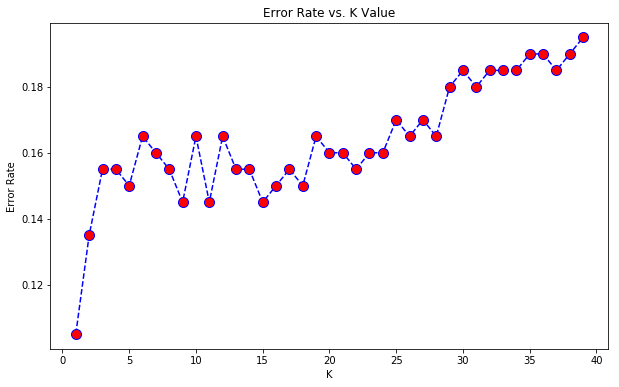

In [65]:
import numpy as np 
import matplotlib.pyplot as plt

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xo_train,yo_train)
    pred_i = knn.predict(Xo_test)
    error_rate.append(np.mean(pred_i != yo_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

função de peso usada na previsão. Valores possíveis:

"Uniforme": pesos uniformes. Todos os pontos em cada neighborhood são ponderados igualmente.
‘Distância’: pontos de ponderação pelo inverso da distância. Nesse caso, os vizinhos mais próximos de um ponto de consulta terão uma influência maior do que os vizinhos mais distantes.
(callable): uma função definida pelo usuário que aceita uma matriz de distâncias e retorna uma matriz da mesma forma que contém os pesos.

Parâmetro de potência para a métrica Minkowski. Quando p = 1, isso equivale a usar manhattan_distance (l1) e euclidean_distance (l2) para p = 2. Para p arbitrário, minkowski_distance (l_p) é usado.

In [66]:
# NOW WITH K=1

knn = KNeighborsClassifier(n_neighbors=1, weights='distance',p=1)

knn.fit(Xo_train,yo_train)
pred = knn.predict(Xo_test)

print('WITH K=1')
print('\n')
print('Confusion Matrix')
cm_knn = confusion_matrix(yo_test,pred)
print(cm_knn)
print('\n')
rpt_knn = classification_report(yo_test,pred)
print(rpt_knn)

WITH K=1


Confusion Matrix
[[90 13]
 [ 2 95]]


              precision    recall  f1-score   support

           0       0.98      0.87      0.92       103
           1       0.88      0.98      0.93        97

   micro avg       0.93      0.93      0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



### Seleção de recursos usando o método Hill climbing

In [67]:
from sklearn.utils import shuffle
new_Ind = []

In [68]:
cur_MaxScore = 0.0

In [69]:
col_num = 8

In [70]:
col_Ind_Random = shuffle(range(0,col_num), random_state=13)

In [71]:

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = data.values[:, new_Ind]
    Xs_train, Xs_test, ys_train, ys_test = train_test_split(newData, target, test_size=0.2, random_state=1987)
    clf = KNeighborsClassifier(1)
    fit = clf.fit(Xs_train, ys_train)
    cur_Score = clf.score(Xs_test, ys_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))


Score with 1 selected features: 0.6493506493506493
Score with 2 selected features: 0.7922077922077922
Score with 3 selected features: 0.8051948051948052
Score with 4 selected features: 0.8181818181818182


Text(0,0.5,'Error Rate')

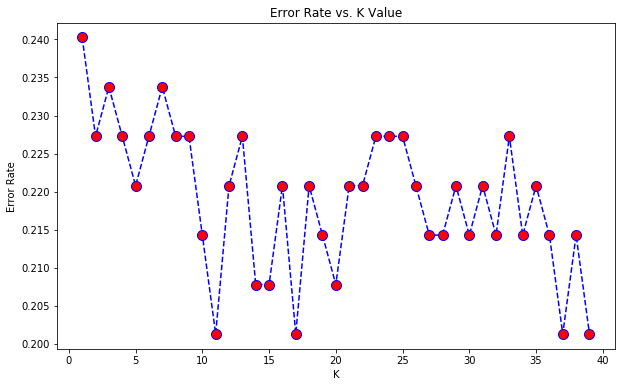

In [72]:

error_rate = []
random_state=19
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xs_train,ys_train)
    pred_i = knn.predict(Xs_test)
    error_rate.append(np.mean(pred_i != ys_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [73]:
knn = KNeighborsClassifier(n_neighbors=9, weights='distance',p=1)

knn.fit(Xs_train,ys_train)
pred = knn.predict(Xs_test)

print('WITH K=31')
print('\n')
print('Confusion Matrix')
cm_knn = confusion_matrix(ys_test,pred)
print(cm_knn)
print('\n')
rpt_knn = classification_report(ys_test,pred)
print(rpt_knn)

WITH K=31


Confusion Matrix
[[90 11]
 [16 37]]


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       101
           1       0.77      0.70      0.73        53

   micro avg       0.82      0.82      0.82       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



### KNN without SMOT

Text(0,0.5,'Error Rate')

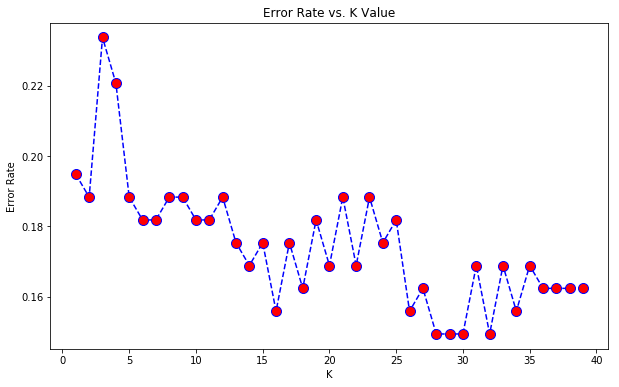

In [74]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [75]:
knn = KNeighborsClassifier(n_neighbors=30, weights='distance',p=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=31')
print('\n')
print('Confusion Matrix')
cm_knn = confusion_matrix(y_test,pred)
print(cm_knn)
print('\n')
rpt_knn = classification_report(y_test,pred)
print(rpt_knn)

WITH K=31


Confusion Matrix
[[86 14]
 [ 8 46]]


              precision    recall  f1-score   support

           0       0.91      0.86      0.89       100
           1       0.77      0.85      0.81        54

   micro avg       0.86      0.86      0.86       154
   macro avg       0.84      0.86      0.85       154
weighted avg       0.86      0.86      0.86       154



## Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier
random_state=234
dtree = DecisionTreeClassifier(random_state=998)

In [77]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=998,
            splitter='best')

In [78]:
pred = dtree.predict(X_test)
print("Accuracy for Decision treeclassifier is",metrics.accuracy_score(pred,y_test))

Accuracy for Decision treeclassifier is 0.8311688311688312


In [79]:
print('Confusion Matrix')
cm_dtree = confusion_matrix(y_test,pred)
print(cm_dtree)
print('\n')
rpt_dtree = classification_report(y_test,pred)
print(rpt_dtree)

Confusion Matrix
[[86 14]
 [12 42]]


              precision    recall  f1-score   support

           0       0.88      0.86      0.87       100
           1       0.75      0.78      0.76        54

   micro avg       0.83      0.83      0.83       154
   macro avg       0.81      0.82      0.82       154
weighted avg       0.83      0.83      0.83       154



In [80]:
from IPython.display import Image
from sklearn import tree

dot_data = tree.export_graphviz(dtree, out_file='tree.dot', 
                         filled=True, rounded=True,  
                         special_characters=True) 

In [81]:
feat_names = pima.copy().iloc[:, 0:8].columns
targ_names = ['Yes','No']

In [82]:
!pip install graphviz

Caso tenha erro com o graphviz, você deve configurá-lo no seu SO:

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

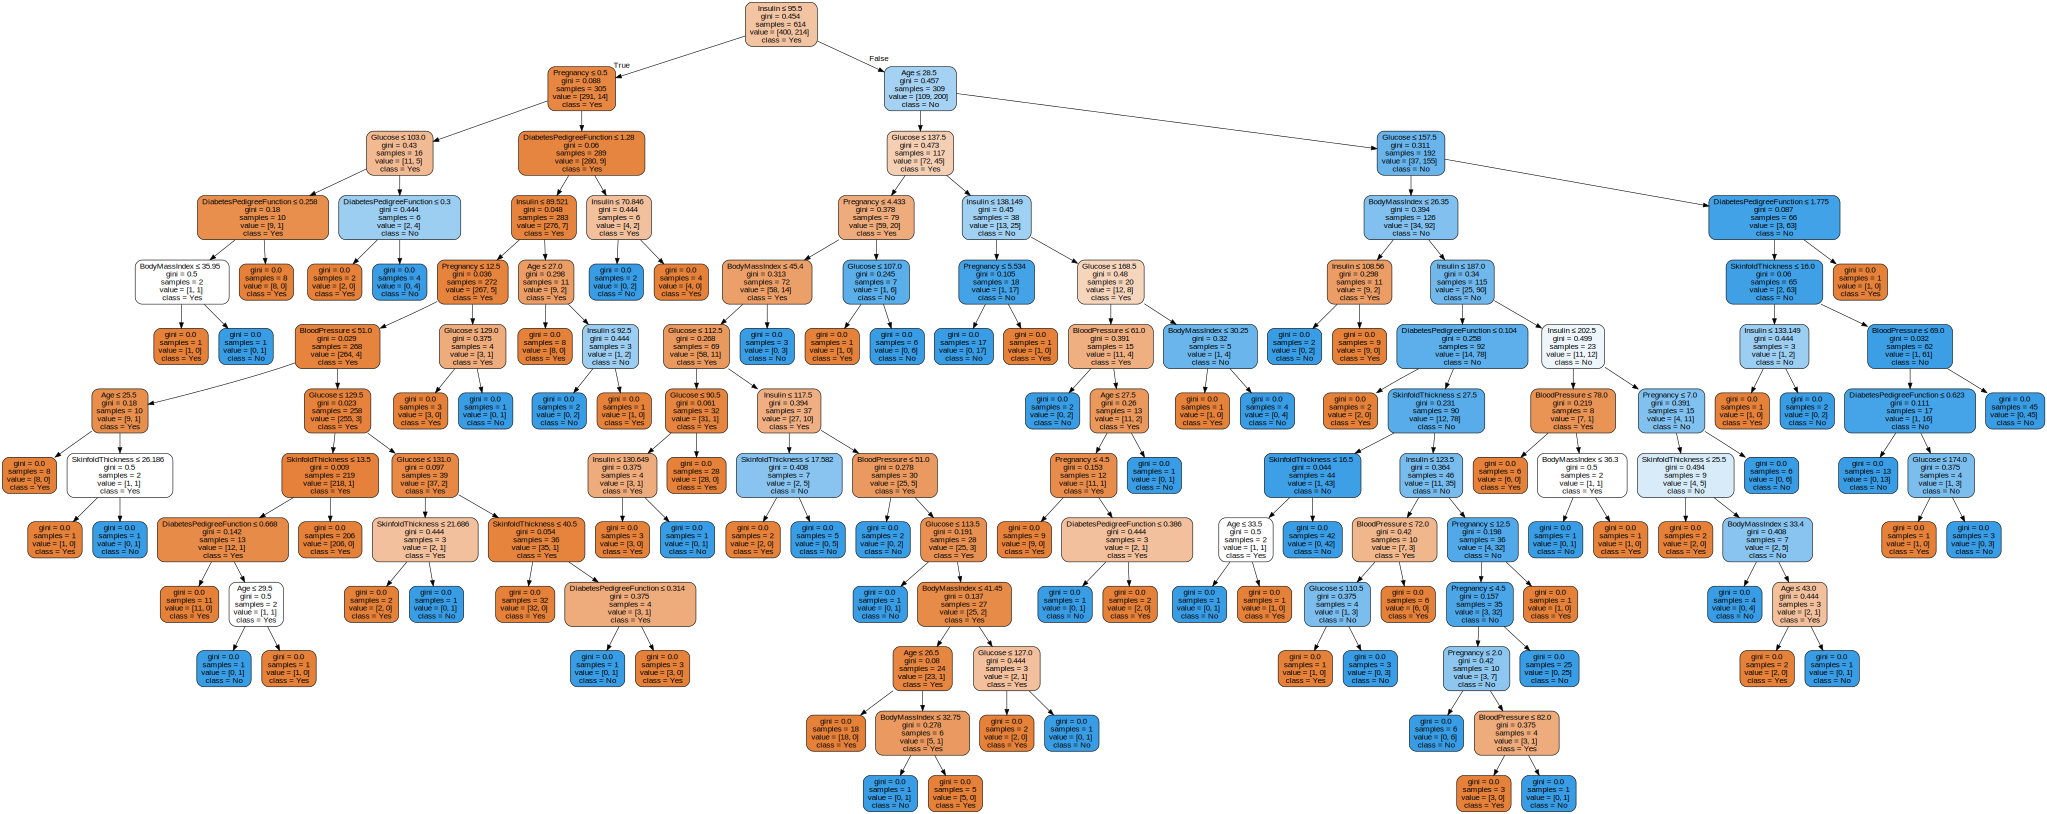

In [83]:
import graphviz
import os
from sklearn import tree
os.environ["PATH"] += os.pathsep + path
from sklearn.tree import DecisionTreeClassifier,export_graphviz

import graphviz

data1 = export_graphviz(dtree,out_file=None,feature_names=feat_names,class_names=targ_names,   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data1)
graph

## Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
# number of base decision tree estimators
n_est = 100
# maximum depth of any given decision tree estimator
max_depth = 5
# random state variable
rstate = 42
# initialize a random forest algorithm

rf = RandomForestClassifier(n_estimators=n_est, 
                             max_depth=max_depth,
                             random_state=rstate)

In [86]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [87]:
pred = rf.predict(X_test)

In [88]:
print('Confusion Matrix')
cm_rf = confusion_matrix(y_test,pred)
print(cm_rf)
print('\n')
rpt_rf = classification_report(y_test,pred)
print(rpt_rf)

Confusion Matrix
[[91  9]
 [ 5 49]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       100
           1       0.84      0.91      0.88        54

   micro avg       0.91      0.91      0.91       154
   macro avg       0.90      0.91      0.90       154
weighted avg       0.91      0.91      0.91       154



In [89]:
# list of columns to be used for training each model
features = [col for col in list(X_train) ]
print('%i features: %s' % (len(features), features))

8 features: ['Pregnancy', 'Glucose', 'BloodPressure', 'SkinfoldThickness', 'Insulin', 'BodyMassIndex', 'DiabetesPedigreeFunction', 'Age']


In [90]:
# report the most important featuers for predicting each target

# collect ranking of most "important" features for E
importances =  rf.feature_importances_
descending_indices = np.argsort(importances)[::-1]
sorted_importances = [importances[idx] for idx in descending_indices]
sorted_features = [features[idx] for idx in descending_indices]
print('Most important feature for diabetes energy is %s' % sorted_features[0])

Most important feature for diabetes energy is Insulin


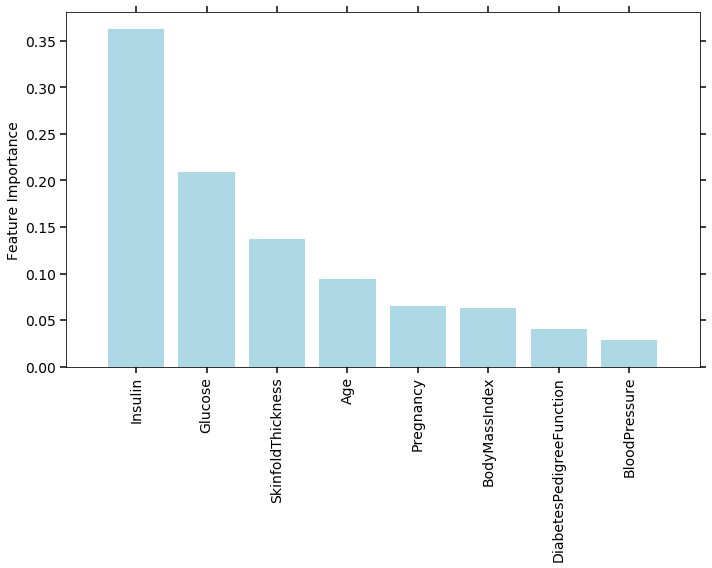

In [91]:
# plot the feature importances

def plot_importances(X_train, sorted_features, sorted_importances):
    """
    Args:
        X_train (nd-array) - feature matrix of shape (number samples, number features)
        sorted_features (list) - feature names (str)
        sorted_importances (list) - feature importances (float)
    Returns:
        matplotlib bar chart of sorted importances
    """
    axis_width = 1.5
    maj_tick_len = 6
    fontsize = 14
    bar_color = 'lightblue'
    align = 'center'
    label = '__nolegend__'
    ax = plt.bar(range(X_train.shape[1]), sorted_importances,
                 color=bar_color, align=align, label=label)
    ax = plt.xticks(range(X_train.shape[1]), sorted_features, rotation=90)
    ax = plt.xlim([-1, X_train.shape[1]])
    ax = plt.ylabel('Feature Importance', fontsize=fontsize)
    ax = plt.tick_params('both', length=maj_tick_len, width=axis_width, 
                         which='major', right=True, top=True)
    ax = plt.xticks(fontsize=fontsize)
    ax = plt.yticks(fontsize=fontsize)
    ax = plt.tight_layout()
    return ax

fig1 = plt.figure(1, figsize=(10,8))

ax = plot_importances(X_train, sorted_features, sorted_importances)

# plt.tight_layout()
plt.show()
plt.close()

## Comparison of the models

In [92]:
temp=[]
classifier=['Decision Tree','Random Forest','KNN','KNN (Smote)']
models=[DecisionTreeClassifier(random_state=998),RandomForestClassifier(n_estimators=n_est, 
                             max_depth=max_depth,
                             random_state=rstate),KNeighborsClassifier(n_neighbors=6),"SMOTE"]
for i in models:
    model = i
    if model == "SMOTE":
        model = KNeighborsClassifier(n_neighbors=1,weights='distance',p=1)
        model.fit(Xo_train,yo_train)
        pred1=model.predict(Xo_test)
        temp.append(metrics.accuracy_score(pred1,yo_test))
    else:
        model.fit(X_train,y_train)
        prediction=model.predict(X_test)    
        temp.append(metrics.accuracy_score(prediction,y_test))
        
models_dataframe=pd.DataFrame(temp,index=classifier)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Decision Tree,0.831169
Random Forest,0.909091
KNN,0.818182
KNN (Smote),0.925000


## Usando Apenas as Features Mais Importantes

In [93]:
diab2=pima[['Pregnancy','Glucose','SkinfoldThickness','Insulin','BodyMassIndex','Age','Class']]

train1,test1=train_test_split(diab2,test_size=0.20,random_state=437,stratify=diab2['Class'])

X_train=train1[train1.columns[:6]]
X_test=test1[test1.columns[:6]]
y_train=train1['Class']
y_test=test1['Class']

# SMOTE
np.random.seed(795)
data1, target1 = SMOTE().fit_sample(diab2, diab2.Class)
Xo_train, Xo_test, yo_train, yo_test = train_test_split(data1, target1, test_size=0.20, random_state=4)

In [94]:
temp=[]
classifier=['Decision Tree','Random Forest','KNN','KNN (Smote)']
models=[DecisionTreeClassifier(random_state=998),RandomForestClassifier(n_estimators=n_est, 
                             max_depth=max_depth,
                             random_state=rstate),KNeighborsClassifier(n_neighbors=6),"SMOTE"]
for i in models:
    model = i
    if model == "SMOTE":
        model = KNeighborsClassifier(n_neighbors=1,weights='distance',p=1)
        model.fit(Xo_train,yo_train)
        pred1=model.predict(Xo_test)
        temp.append(metrics.accuracy_score(pred1,yo_test))
    else:
        model.fit(X_train,y_train)
        prediction=model.predict(X_test)    
        temp.append(metrics.accuracy_score(prediction,y_test))
        
models_dataframe=pd.DataFrame(temp,index=classifier)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Decision Tree,0.850649
Random Forest,0.902597
KNN,0.850649
KNN (Smote),0.880000


## Cross validation

In [95]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
kfold = KFold(n_splits=10, random_state=998) 

In [96]:
temp=[]
accuracy=[]
classifiers=['KNN','KNN (SMOTE)','Decision Tree','Random Forest']
models=[KNeighborsClassifier(n_neighbors=6),"SMOTE", DecisionTreeClassifier(),RandomForestClassifier(n_estimators=n_est, 
                             max_depth=max_depth,
                             random_state=938)]
for i in models:
    model = i
    
    if model == "SMOTE":
        model = KNeighborsClassifier(n_neighbors=1,weights='distance',p=1)
        cv_result = cross_val_score(model,data_o,target_o, cv = kfold,scoring = "accuracy")
        temp.append(cv_result.mean())
        accuracy.append(cv_result)
       
    else:
        cv_result = cross_val_score(model,data,target, cv = kfold,scoring = "accuracy")
        temp.append(cv_result.mean())
        accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame(temp,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    
new_models_dataframe2

,CV Mean
KNN,0.753794
KNN (SMOTE),0.910000
Decision Tree,0.802085
Random Forest,0.871138


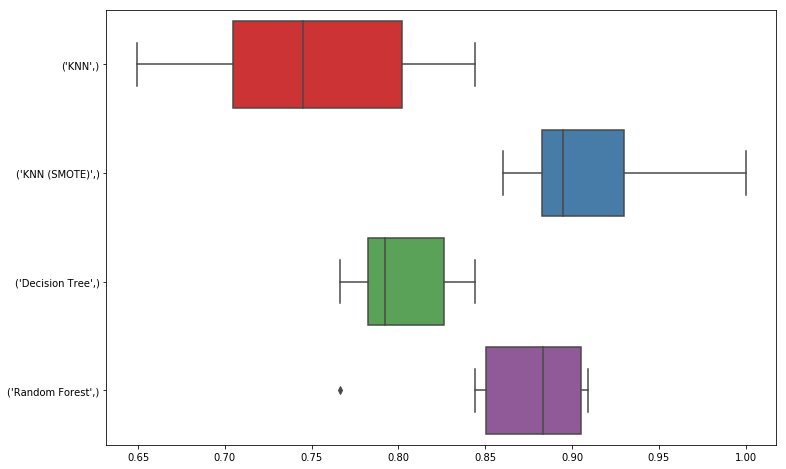

In [97]:
box=pd.DataFrame(accuracy,index=[classifiers])
fig3 = plt.figure(1, figsize=(12,8))
sns.boxplot(data=box.T, orient="h", palette="Set1")
plt.show()

# Parametric Tuning for random forest

In [98]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [99]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [100]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [101]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [102]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [103]:
base_model = RandomForestClassifier(random_state = 82)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.1299 degrees.
Accuracy = 87.01%.


In [104]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.1169 degrees.
Accuracy = 88.31%.


In [105]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.49%.


# Parametric Tuning for decision tree

In [106]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dtree.get_params())

Parameters currently in use:

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 998,
 'splitter': 'best'}


In [107]:
from sklearn.model_selection import RandomizedSearchCV

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_state=294

# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}


In [108]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dtree = DecisionTreeClassifier()
random_state=194
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtree_random = RandomizedSearchCV(estimator = dtree, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=294, n_jobs = -1)
# Fit the random search model
dtree_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
          pre_dispatch='2*n_jobs', random_state=294, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [109]:
dtree_random.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'max_depth': 40}

In [110]:
base_model =  DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=3,random_state=474)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.1753 degrees.
Accuracy = 82.47%.


In [111]:
pprint(base_model.get_params())

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 474,
 'splitter': 'best'}


In [112]:
best_dtree_random = dtree_random.best_estimator_
best_dtree_random.fit(X_train, y_train)
random_accuracy = evaluate(best_dtree_random, X_test, y_test)

Model Performance
Average Error: 0.1753 degrees.
Accuracy = 82.47%.


In [113]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.


In [114]:
best_dtree_random

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
dot_data = tree.export_graphviz(best_dtree_random, out_file='tree2.dot', 
                         filled=True, rounded=True,  
                         special_characters=True) 

In [116]:
temp=[]
accuracy=[]
classifiers=['KNN','KNN (SMOTE)','Decision Tree','Random Forest']
models=[KNeighborsClassifier(n_neighbors=6),"SMOTE", best_dtree_random,best_random]
for i in models:
    model = i
    
    if model == "SMOTE":
        model = KNeighborsClassifier(n_neighbors=1,weights='distance',p=1)
        cv_result = cross_val_score(model,data_o,target_o, cv = kfold,scoring = "accuracy")
        temp.append(cv_result.mean())
        accuracy.append(cv_result)
       
    else:
        cv_result = cross_val_score(model,data,target, cv = kfold,scoring = "accuracy")
        temp.append(cv_result.mean())
        accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame(temp,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    
new_models_dataframe2

,CV Mean
KNN,0.753794
KNN (SMOTE),0.910000
Decision Tree,0.816473
Random Forest,0.873735


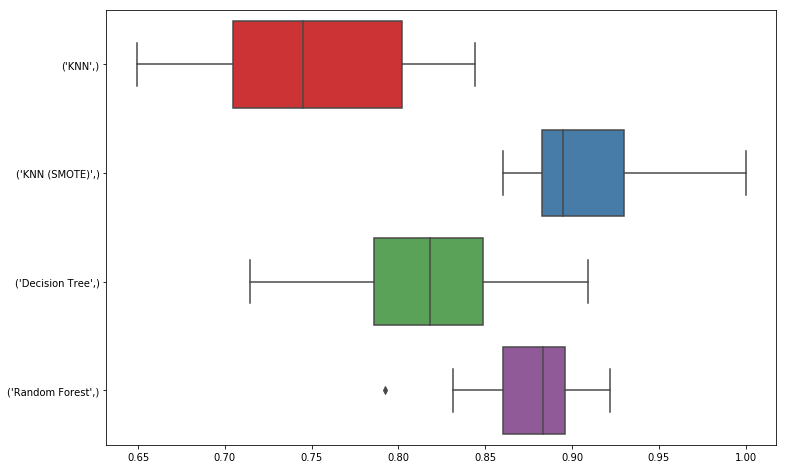

In [117]:
box=pd.DataFrame(accuracy,index=[classifiers])
fig3 = plt.figure(1, figsize=(12,8))
sns.boxplot(data=box.T, orient="h", palette="Set1")
plt.show()

# Fim
# Obrigado
# www.datascienceacademy.com.br